# Operaciones de manejo de datos

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

### Data Wrangling - La cirugía de datos

El data wrangling, a veces denominada data munging, es el proceso de transformar y mapear datos de un dataset raw, en otro formato con la intencion de hacerlo más apropiado y valioso para una variedad de propositos posteriores, un *data wrangler* es una persona que realiza estas operaciones de transformación. 

Esto puede incluir en munging, visualización de datos, agregación de datos, agregación de un modelo estadistico, asi como muchos otros usos potenciales. 

####  Buscar un subconjunto de datos de un dataset

In [2]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [3]:
data.head(5)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


#### Subconjunto

In [4]:
account_lenght = data["Account Length"]

In [5]:
account_lenght.head(5)

0    128
1    107
2    137
3     84
4     75
Name: Account Length, dtype: int64

In [10]:
type(account_lenght)

pandas.core.series.Series

In [13]:
others = data[["Account Length", "Phone", "Day Calls"]]

In [14]:
others.head()

,Account Length,Phone,Day Calls
0,128,382-4657,110
1,107,371-7191,123
2,137,358-1921,114
3,84,375-9999,71
4,75,330-6626,113


In [15]:
type(others)

pandas.core.frame.DataFrame

Hacerlo de otra manera, y en automatico. 

In [18]:
other_way = ["Account Length", "Phone", "Day Calls", "Eve Charge"]
subset = data[other_way]
subset.head()

,Account Length,Phone,Day Calls,Eve Charge
0,128,382-4657,110,16.78
1,107,371-7191,123,16.62
2,137,358-1921,114,10.30
3,84,375-9999,71,5.26
4,75,330-6626,113,12.61


In [31]:
to_eliminate = ["Account Length", "Phone", "Day Calls", "Eve Charge", "Night Calls"]
all_columns_list = data.columns.values.tolist()
sublist = [x for x in all_columns_list if x not in to_eliminate]
subset = data[sublist]
subset.head()

,State,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Charge,Eve Mins,Eve Calls,Night Mins,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,415,no,yes,25,265.1,45.07,197.4,99,244.7,11.01,10.0,3,2.70,1,False.
1,OH,415,no,yes,26,161.6,27.47,195.5,103,254.4,11.45,13.7,3,3.70,1,False.
2,NJ,415,no,no,0,243.4,41.38,121.2,110,162.6,7.32,12.2,5,3.29,0,False.
3,OH,408,yes,no,0,299.4,50.90,61.9,88,196.9,8.86,6.6,7,1.78,2,False.
4,OK,415,yes,no,0,166.7,28.34,148.3,122,186.9,8.41,10.1,3,2.73,3,False.


In [27]:
subset1 = data[to_eliminate]
subset1.head()

,Account Length,Phone,Day Calls,Eve Charge,Night Calls
0,128,382-4657,110,16.78,91
1,107,371-7191,123,16.62,103
2,137,358-1921,114,10.30,104
3,84,375-9999,71,5.26,89
4,75,330-6626,113,12.61,121


#### Subconjuntos de filas con ciertas condiciones

In [33]:
data[12:16]

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
12,IA,168,408,363-1107,no,no,0,128.8,96,21.90,...,71,8.92,141.1,128,6.35,11.2,2,3.02,1,False.
13,MT,95,510,394-8006,no,no,0,156.6,88,26.62,...,75,21.05,192.3,115,8.65,12.3,5,3.32,3,False.
14,IA,62,415,366-9238,no,no,0,120.7,70,20.52,...,76,26.11,203.0,99,9.14,13.1,6,3.54,4,False.
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.


#### Ejemplo: Usuarios con Day Calls > 70

In [64]:
data1 = data[data["Day Mins"]>300]
data1.shape

(43, 21)

#### Ejemplo: State debe ser New York

In [65]:
data2 = data[data["State"]=="NY"]
data2.shape

(83, 21)

### AND ----> & / OR -----> |

In [50]:
data3 = data[(data["Day Mins"]>300) & (data["State"]=="NY")]
data3

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
985,NY,64,415,345-9140,yes,no,0,346.8,55,58.96,...,79,21.21,275.4,102,12.39,13.3,9,3.59,1,True.


In [55]:
data3.shape # Inner Join

(2, 21)

In [56]:
data4 = data[(data["Day Mins"]>300) | (data["State"]=="NY")]
data4.shape # Full Join

(124, 21)

In [67]:
d = data1+data2
d.shape

(124, 21)

In [72]:
data3 = data[(data["Day Mins"]< data["Night Mins"]) & (data["State"]=="NY") | (data["State"]=="OK") ]
data3

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
34,OK,57,408,395-2854,no,yes,25,176.8,94,30.06,...,75,16.58,213.5,116,9.61,8.3,4,2.24,0,False.
59,OK,125,408,355-7251,no,no,0,229.3,103,38.98,...,126,15.08,189.3,95,8.52,12.0,8,3.24,1,False.
77,NY,144,408,360-1171,no,no,0,61.6,117,10.47,...,85,6.55,173.0,99,7.79,8.2,7,2.21,4,True.
136,NY,75,415,374-8525,no,yes,21,175.8,97,29.89,...,106,18.49,237.5,134,10.69,5.3,4,1.43,5,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3275,NY,120,510,405-5083,no,yes,27,128.5,115,21.85,...,91,13.91,242.9,121,10.93,0.0,0,0.00,1,False.
3277,OK,134,415,378-2397,no,no,0,164.9,115,28.03,...,96,10.75,238.5,125,10.73,10.0,9,2.70,2,False.
3307,OK,172,408,398-3632,no,no,0,203.9,109,34.66,...,123,19.89,160.7,65,7.23,17.8,4,4.81,4,False.
3310,NY,94,415,363-1123,no,no,0,190.4,91,32.37,...,107,7.82,224.8,108,10.12,13.6,17,3.67,2,False.


#### Subconjuntos con filas y columnas

Ejemplo: mins de dia, de noche y longitud de la cuenta de los primeros 50 usuarios.

In [80]:
subset_first_50 = data[["Day Mins", "Night Mins", "Account Length"]][:50] # Aqui son columnas despues filas. 
subset_first_50.shape

(50, 3)

### Consultar posiciones con función loc & iloc

In [95]:
data.iloc[1:10, 3:6] # Primeras 10 filas y columnas de la 3 a la 6. Aqui son filas despues columnas. 

,Phone,Int'l Plan,VMail Plan
1,371-7191,no,yes
2,358-1921,no,no
3,375-9999,yes,no
4,330-6626,yes,no
5,391-8027,yes,no
6,355-9993,no,yes
7,329-9001,yes,no
8,335-4719,no,no
9,330-8173,yes,yes


In [99]:
data.iloc[[1,3,7,9],[3,4,5]] # Tambien podemos filtrar de esta manera. 

,Phone,Int'l Plan,VMail Plan
1,371-7191,no,yes
3,375-9999,yes,no
7,329-9001,yes,no
9,330-8173,yes,yes


In [101]:
data.loc[[1,3,7,9],["Area Code", "Day Mins"]]# Y con loc lo podemos hacer combinando etiquetas y numeros. 

,Area Code,Day Mins
1,415,161.6
3,408,299.4
7,415,157.0
9,415,258.6


In [102]:
data["Total Mins"] = data["Day Mins"] + data["Eve Mins"] + data["Night Mins"]
data["Total Mins"].head()

0    707.2
1    611.5
2    527.2
3    558.2
4    501.9
Name: Total Mins, dtype: float64

In [105]:
data["Total Calls"] = data["Day Calls"] + data["Eve Calls"] + data["Night Calls"]
data.head() # Ya aparecen nuestras nuevas variables creadas. 

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Total Mins,Total Calls
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,False.,707.2,300
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,False.,611.5,329
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,False.,527.2,328
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,False.,558.2,248
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,False.,501.9,356


### Funciones de distribución de probabilidad

#### La distribución uniforme

In [118]:
lower = 1
upper = 100
obs = 2000
data = np.random.uniform(lower, upper, obs) # Con la libreria numpy creamos una lista de valores aleatorios. 

(array([202., 184., 202., 215., 213., 191., 192., 191., 216., 194.]),
 array([ 1.01116847, 10.90704672, 20.80292497, 30.69880321, 40.59468146,
        50.49055971, 60.38643795, 70.2823162 , 80.17819445, 90.07407269,
        99.96995094]),
 <a list of 10 Patch objects>)

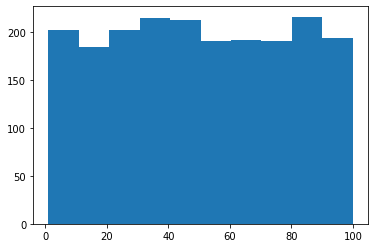

In [119]:
%matplotlib inline
plt.hist(data)

### La distribución normal

In [127]:
data = np.random.randn(100)

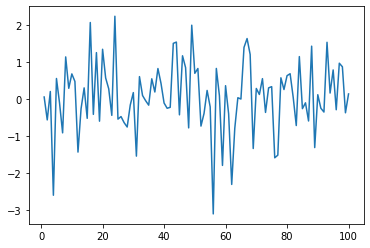

In [128]:
x = range(1, 101)
plt.plot(x, data)

(array([ 2.,  1., 10., 13., 28., 24., 15.,  6.,  0.,  1.]),
 array([-3.06287043, -2.47107759, -1.87928474, -1.28749189, -0.69569905,
        -0.1039062 ,  0.48788665,  1.07967949,  1.67147234,  2.26326519,
         2.85505803]),
 <a list of 10 Patch objects>)

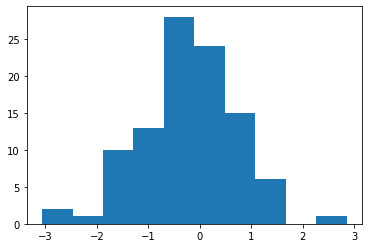

In [124]:
plt.hist(data)

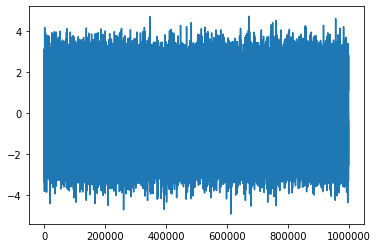

In [129]:
data = np.random.randn(1000000)
x = range(1, 1000001)
plt.plot(x, data)

(array([4.10000e+01, 1.38300e+03, 2.03520e+04, 1.23884e+05, 3.18274e+05,
        3.44422e+05, 1.58414e+05, 3.06550e+04, 2.46800e+03, 1.07000e+02]),
 array([-4.91009845, -3.94664362, -2.9831888 , -2.01973398, -1.05627916,
        -0.09282433,  0.87063049,  1.83408531,  2.79754014,  3.76099496,
         4.72444978]),
 <a list of 10 Patch objects>)

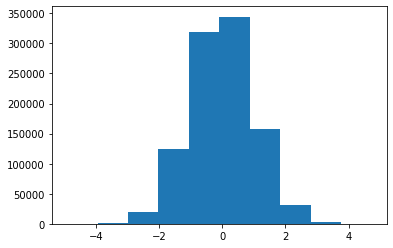

In [130]:
plt.hist(data)

Ejemplo: Ejercicio de examen

(array([  16.,  109.,  507., 1520., 2723., 2698., 1689.,  594.,  123.,
          21.]),
 array([-3.88230615, -2.02653003, -0.17075392,  1.6850222 ,  3.54079831,
         5.39657443,  7.25235054,  9.10812666, 10.96390277, 12.81967889,
        14.675455  ]),
 <a list of 10 Patch objects>)

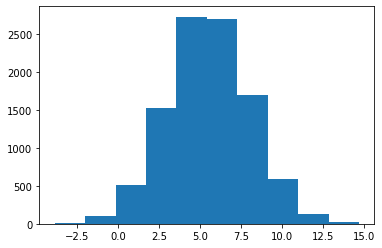

In [136]:
mu = 5.5
sd = 2.5
Z = np.random.randn(10000)
# Z = (X - mu)/sd  -- Tipificación ---> N(0,1)  ---> despejando X = mu + sd * z 
data = mu + sd * Z 
plt.hist(data)

#### Generando dummy data frames